## Importación de librerías

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
# Datos en bruto
data = datasets.load_wine()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
df_wine = pd.DataFrame(data= data.data, columns = data.feature_names)
df_wine['target'] = data.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# Buscamos valores nulos o negativos
nulos = df_wine.isnull()
columnas_con_nulos = nulos.any()
print(columnas_con_nulos)
print()
negativos = df_wine < 0
columnas_con_negativos = negativos.any()
print(columnas_con_negativos)

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
target                          False
dtype: bool

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False

In [7]:
# Contamos el numero total de clases existentes en el DataFrame
class_counts = df_wine['target'].value_counts()

# Localizamos la clase que menos registros tiene
min_count = class_counts.min()

# Igualamos el resto de registros a la clase minoritaria

df_wine1 = pd.DataFrame()

for clase in class_counts.index:
    temp_df = df_wine[df_wine['target'] == clase].sample(min_count, random_state=42)
    df_wine1 = pd.concat([df_wine1, temp_df])


df_wine1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
81,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0,1
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
114,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0,1


In [8]:
# Verificamos la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(df_wine1.shape)

Cantidad de datos:
(144, 14)


In [9]:
# Verificamos el número de registros por clase
df_wine1['target'].value_counts()

1    48
0    48
2    48
Name: target, dtype: int64

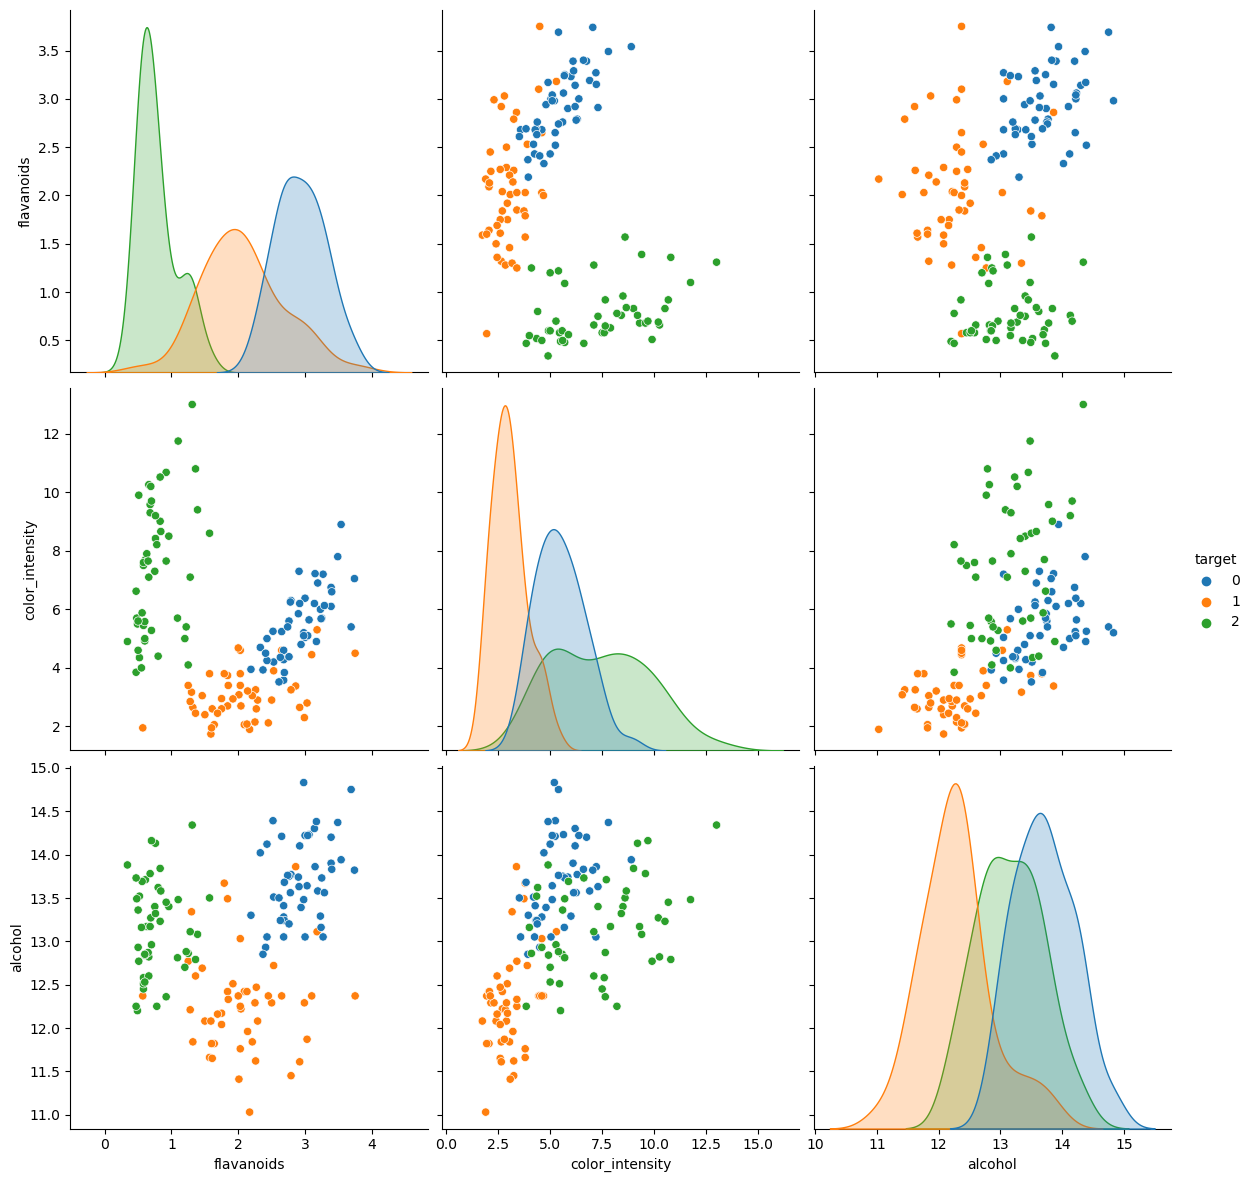

In [10]:
# Otros tipos de gráficos
df = df_wine1[['flavanoids', 'color_intensity', 'alcohol','target']]
sns.pairplot(df, hue='target', height=4, palette='tab10')
plt.show()

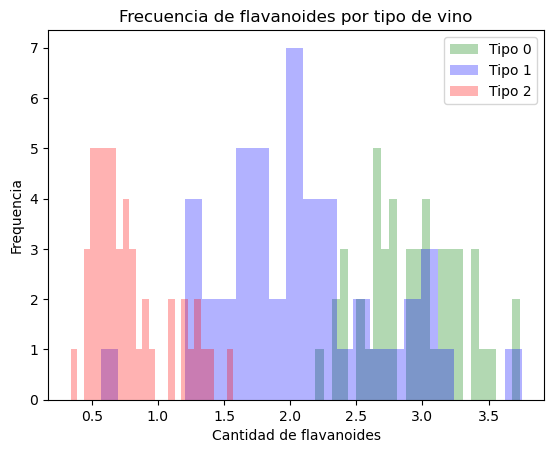

In [11]:
# Histograma de la variable flavanoides

x1 = df_wine1.loc[df_wine1.target==0, 'flavanoids']
x2 = df_wine1.loc[df_wine1.target==1, 'flavanoids']
x3 = df_wine1.loc[df_wine1.target==2, 'flavanoids']

# Argumentos para los colores

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0')
plt.hist(x2, **kwargs, color='b', label='Tipo 1')
plt.hist(x3, **kwargs, color='r', label='Tipo 2')
plt.gca().set(title='Frecuencia de flavanoides por tipo de vino', xlabel='Cantidad de flavanoides', ylabel='Frequencia')

plt.legend();

## Preprocesamiento de datos

### Selección de datos

In [12]:
# Seleccionamos las características a tener en cuenta para crear el modelo
X = df_wine1[['flavanoids','color_intensity','alcohol']]

In [13]:
# Definimos los datos correspondientes a las etiquetas
y = df_wine1['target']

### División de datos (conjuntos de entrenamiento y de prueba)

In [14]:
# Dividimos los datos, 80% para entrenamiento y 20% para la prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Conjunto de desarrollo, conjunto de validación

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state= 1)


## Creación del modelo de Clasificación

In [15]:
# Selección de k (número de vecinos más cercanos a tener en cuenta)
k = 5

# Creación del modelo
knn_model = KNeighborsClassifier(n_neighbors=k)

# Ajuste del modelo al conjunto de datos de entrenamiento
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Predicción del conjunto de datos de validación

In [16]:
y_pred = knn_model.predict(X_val)

## Validación de resultados

In [17]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_val
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
139,2,2
46,0,0
95,1,1
78,1,1
26,0,0


### Matriz de confusión

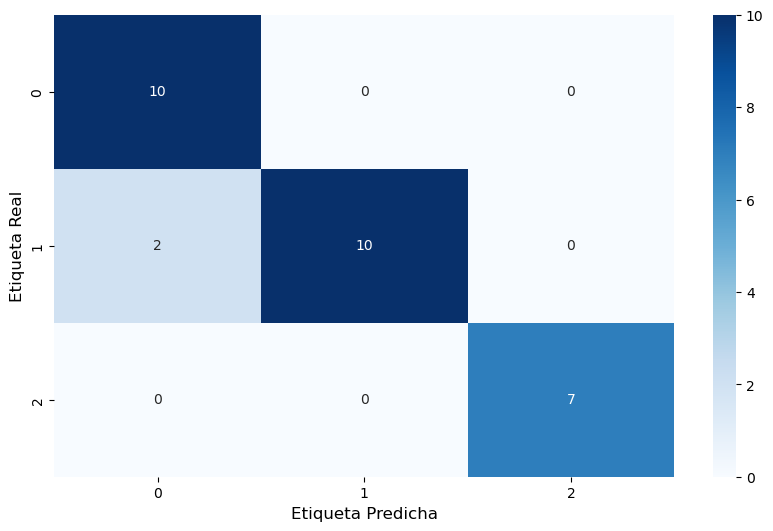

In [18]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

## Métricas

In [19]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.83      0.91        12
           2       1.00      1.00      1.00         7

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.94        29
weighted avg       0.94      0.93      0.93        29



## Predicción del conjunto de datos de prueba

In [20]:
# Predicción del conjunto de datos de prueba
y_pred = knn_model.predict(X_test)

## Validación de resultados

In [21]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
92,1,1
21,0,0
170,2,2
109,1,1
163,2,2


### Matriz de confusión

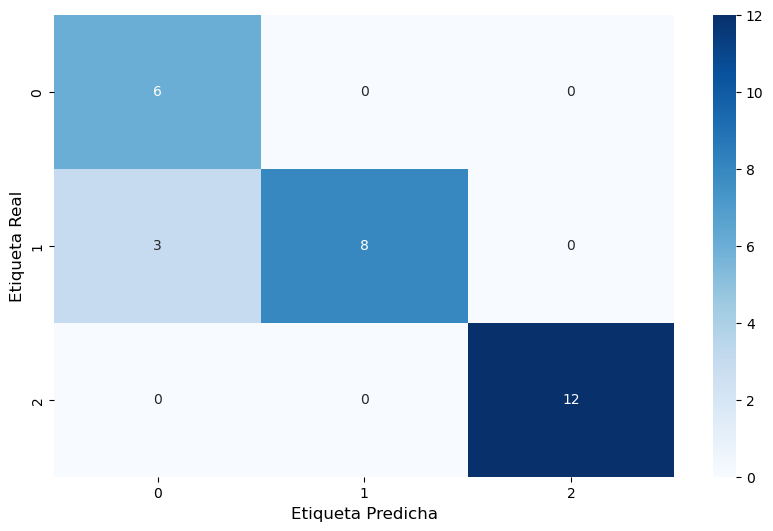

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

## Métricas

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.73      0.84        11
           2       1.00      1.00      1.00        12

    accuracy                           0.90        29
   macro avg       0.89      0.91      0.88        29
weighted avg       0.93      0.90      0.90        29



### Conclusión

En primer lugar he buscado si habia algún registro negativo o nulo y despues he adaptado el DataFrame para que todas las clases tuvieran la misma cantidad de registros.
Una vez filtrados y comprobados los datos, he buscado las variables para entrenar el modelo, que menos se solaparan entre ellas. Esto se realiza para que pueda ser más exacto en su predicción. He separado los valores de entrenamiento, validación y prueba, y he aplicado el modelo KNeighborsClassifier con una k=5, con el objetivo de buscar la máxima precisión en la clasificación. Al aplicar el modelo y visualizarlo en la matriz de confusión, salta a la vista que ha tenido errores en la clase 1, cosa que he intentado solucionar añadiendo más variables, pero en algunos casos ha sido a peor.
En un primer momento, los datos de validadación me han dado muy bajos, pero regulando las variables y la k, he conseguido que superara el 90% de fiabilidad.
En conclusión, se ha quedado un modelo con una fiabilidad global del 90-93%, el cual, siendo un porcentaje bastante fiable, se quedaría un poco corto a la hora de predecir la clase 0 y 1, pues solo sería capaz de identificarla entre un 80-90% de los intentos. A mi parecer, es un buen modelo para aplicar en esta base de datos, pero al disponer de tan pocos datos, es posible que nos esté marcando un índice erroneo de fiabilidad.